In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

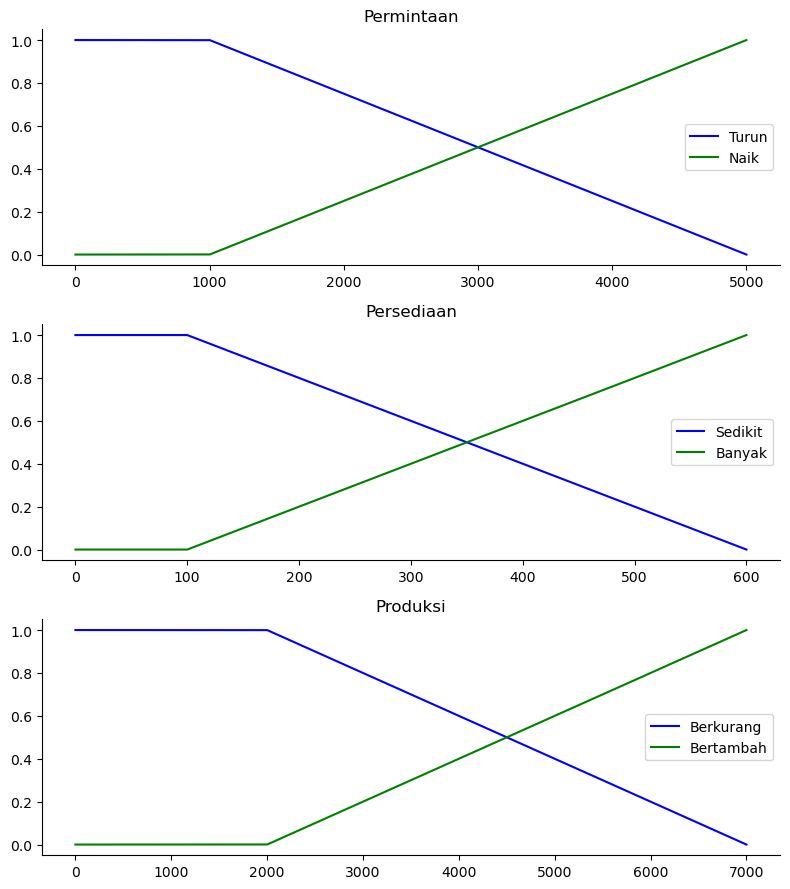

In [17]:
#Menyatakan universe dari variable
permintaan_x=np.arange(0,5001,1)
persediaan_x=np.arange(0,601,1)
produksi_x=np.arange(0,7001,1)

#generate fungsi keanggotaan fuzzy
permintaan_trn=fuzz.trapmf(permintaan_x,[0,0,1000,5000])
permintaan_nk=fuzz.trapmf(permintaan_x,[1000,5000,5000,5000])

persediaan_sdk=fuzz.trapmf(persediaan_x,[0,0,100,600])
persediaan_bnyk=fuzz.trapmf(persediaan_x,[100,600,600,600])

produksi_krng=fuzz.trapmf(produksi_x,[0,0,2000,7000])
produksi_tmbh=fuzz.trapmf(produksi_x,[2000,7000,7000,7000])

fig, (ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(8,9))

#graf1
ax0.plot(permintaan_x,permintaan_trn, 'b',linewidth=1.5,label='Turun')
ax0.plot(permintaan_x,permintaan_nk, 'g',linewidth=1.5,label='Naik')
ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(persediaan_x,persediaan_sdk, 'b',linewidth=1.5,label='Sedikit')
ax1.plot(persediaan_x,persediaan_bnyk, 'g',linewidth=1.5,label='Banyak')
ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(produksi_x,produksi_krng, 'b',linewidth=1.5,label='Berkurang')
ax2.plot(produksi_x,produksi_tmbh, 'g',linewidth=1.5,label='Bertambah')
ax2.set_title('Produksi')
ax2.legend()

#menghilangkan garis atas dan kanan dari ketiga grafik
for ax in (ax0,ax1,ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()

In [18]:
permintaan=int(input("Masukkan Permintaan: "))
persediaan=int(input("masukkan persediaan: "))

In [19]:
#menghitung derajat keanggotaan miu permintaan dan persediaan
miu_permintaan= []
#menghitung miu pada setiap jenis dengan inputan
miu_permintaan.append(fuzz.interp_membership(permintaan_x,permintaan_trn,permintaan))
miu_permintaan.append(fuzz.interp_membership(permintaan_x,permintaan_nk,permintaan))

miu_persediaan=[]

miu_persediaan.append(fuzz.interp_membership(persediaan_x,persediaan_sdk,persediaan))
miu_persediaan.append(fuzz.interp_membership(persediaan_x,persediaan_bnyk,persediaan))

print("")
print("Derajat Keanggotaan Permintaan")
print("Turun: "+str(miu_permintaan[0]))
print("Naik: "+str(miu_permintaan[1]))

print("")
print("Derajat Keanggotaan Persediaan")
print("Sedikit: "+str(miu_persediaan[0]))
print("Banyak: "+str(miu_persediaan[1]))


Derajat Keanggotaan Permintaan
Turun: 0.25
Naik: 0.75

Derajat Keanggotaan Persediaan
Sedikit: 0.6
Banyak: 0.4


In [22]:
"""
Proses Defuzzification dengan Tsukamoto
1. Menghitung alpha dan nilai z dari setiap rule
2. Menghitung dengan rumus rata-rata perkalian alpha dengan z
"""

#Langkah 1
alpha1 = np.fmin(miu_permintaan[0], miu_persediaan[1])
z1     = fuzz.interp_universe(produksi_x, produksi_krng, alpha1)

alpha2 = np.fmin(miu_permintaan[0], miu_persediaan[0])
z2     = fuzz.interp_universe(produksi_x, produksi_krng, alpha2)

alpha3 = np.fmin(miu_permintaan[1], miu_persediaan[1])
z3     = fuzz.interp_universe(produksi_x, produksi_tmbh, alpha3)

alpha4 = np.fmin(miu_permintaan[1], miu_persediaan[0])
z4     = fuzz.interp_universe(produksi_x, produksi_tmbh, alpha4)

print("Alpha 1: {}, Alpha 2: {}, Alpha 3: {}, Alpha 4: {}".format(alpha1, alpha2, alpha3, alpha4))
print("z1: {}, z2: {}, z3: {}, z4: {}".format(z1, z2, z3, z4))


Alpha 1: 0.25, Alpha 2: 0.25, Alpha 3: 0.4, Alpha 4: 0.6
z1: [5750.0], z2: [5750.0], z3: [4000.0], z4: [5000.0]


In [23]:
z = (alpha1*z1[0] + alpha2*z2[0] + alpha3*z3[0] + alpha4*z4[0]) / (alpha1 + alpha2 + alpha3 + alpha4)

print("Barang yang harus di produksi : " + str(int(z)))


Barang yang harus di produksi : 4983
